In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfepl = pd.read_csv(r'Players_per_league/EPL_players.csv')
dfbun = pd.read_csv(r'Players_per_league/Bundesliga_players.csv')
dflag = pd.read_csv(r'Players_per_league/LaLiga_players.csv')
dfsea = pd.read_csv(r'Players_per_league/SerieA_players.csv')
dflig = pd.read_csv(r'Players_per_league/Ligue1_players.csv')

In [3]:
def for_graph(df):
    age = df['Age']
    rating = df['Rating']
    
    return age, rating

In [4]:
epla, eplr = for_graph(dfepl)
buna, bunr = for_graph(dfbun)
laga, lagr = for_graph(dflag)
seaa, sear = for_graph(dfsea)
liga, ligr = for_graph(dflig)

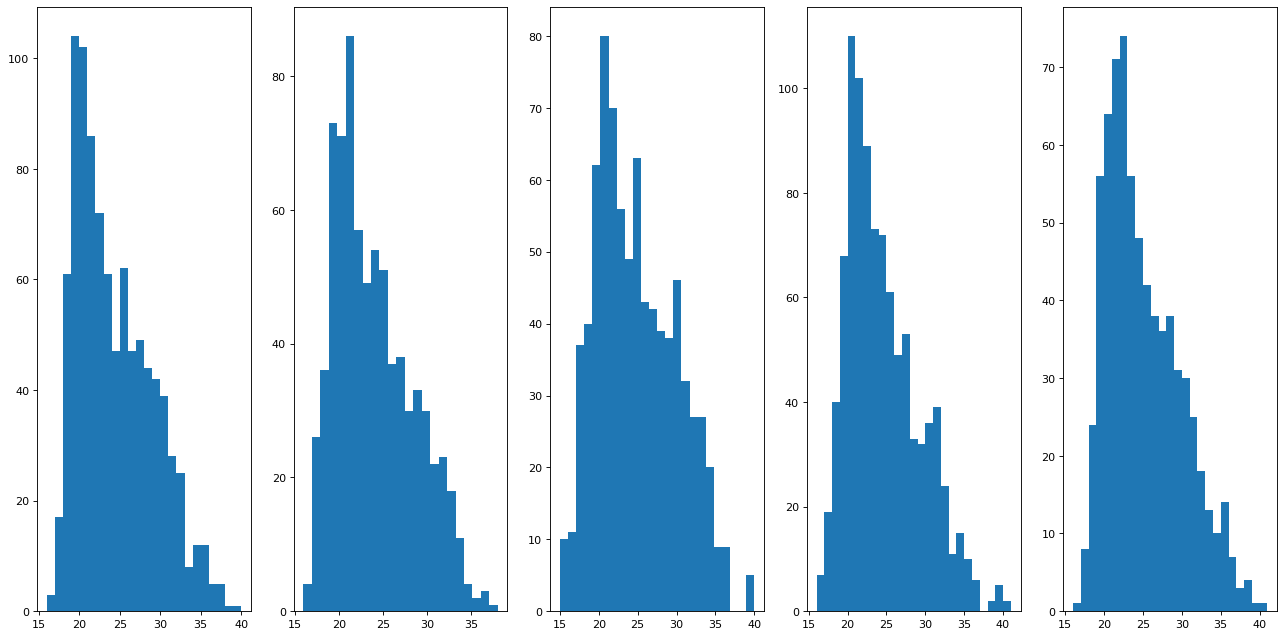

In [14]:
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 5, 1)
plt.hist(epla, bins = len(epla.unique()))
plt.subplot(1, 5, 2)
plt.hist(buna, bins = len(buna.unique()))
plt.subplot(1, 5, 3)
plt.hist(laga, bins = len(laga.unique()))
plt.subplot(1, 5, 4)
plt.hist(seaa, bins = len(seaa.unique()))
plt.subplot(1, 5, 5)
plt.hist(liga, bins = len(liga.unique()))
plt.show()

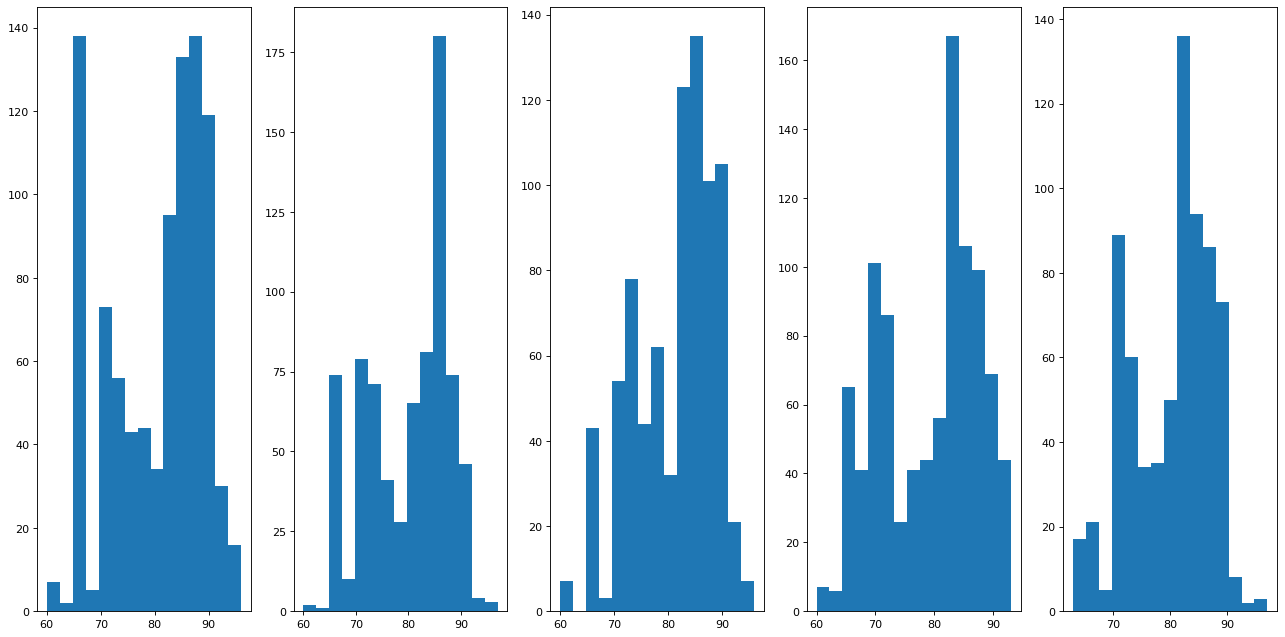

In [16]:
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 5, 1)
plt.hist(eplr, bins = 15)
plt.subplot(1, 5, 2)
plt.hist(bunr, bins = 15)
plt.subplot(1, 5, 3)
plt.hist(lagr, bins = 15)
plt.subplot(1, 5, 4)
plt.hist(sear, bins = 15)
plt.subplot(1, 5, 5)
plt.hist(ligr, bins = 15)
plt.show()

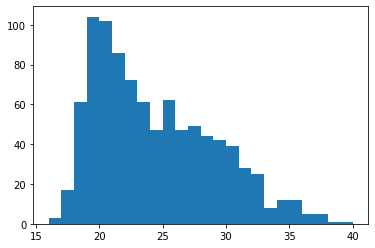

In [43]:
x = epla
x.append(buna)
x.append(laga)
x.append(seaa)
x.append(liga)

y = eplr
y.append(bunr)
y.append(lagr)
y.append(sear)
y.append(ligr)



plt.hist(x, bins=len(x.unique()))
plt.show()

In [39]:
pip install distfit

Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
from scipy import stats
from distfit import distfit

In [18]:
observed = x

In [36]:
def normalise(y, x):
    return y/np.trapz(y, x)

In [37]:
ages = np.array(range(15, 46))
prior = normalise(np.repeat(1, len(ages)), ages)

In [41]:
dist = distfit()
dist.fit_transform(observed)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.03 sec] [RSS: 0.174775] [loc=23.891 scale=4.711]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.201977] [loc=16.000 scale=7.891]
[distfit] >[pareto    ] [0.08 sec] [RSS: 0.228478] [loc=-0.081 scale=16.081]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.168294] [loc=23.607 scale=4.362]
[distfit] >[t         ] [0.09 sec] [RSS: 0.174775] [loc=23.891 scale=4.711]
[distfit] >[genextreme] [0.13 sec] [RSS: 0.160716] [loc=21.576 scale=3.581]
[distfit] >[gamma     ] [0.04 sec] [RSS: 0.157903] [loc=15.672 scale=2.890]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 0.158187] [loc=13.792 scale=9.035]
[distfit] >[beta      ] [0.14 sec] [RSS: 0.159545] [loc=15.885 scale=31.260]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.208551] [loc=16.000 scale=24.000]
[distfit] >[loggamma  ] [0.10 sec] [RSS: 0.174945] [loc=-1274.657 scale=178.913]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.gamma_gen at 0x25ef3749f40>,
  'stats': 'RSS',
  'params': (2.8441404546985716, 15.671959535619731, 2.889698541273514),
  'name': 'gamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x25ef2497cd0>,
  'score': 0.15790307198432663,
  'loc': 15.671959535619731,
  'scale': 2.889698541273514,
  'arg': (2.8441404546985716,),
  'CII_min_alpha': 17.80694308183641,
  'CII_max_alpha': 33.18775464423417},
 'summary':          distr     score  LLE          loc       scale  \
 0        gamma  0.157903  NaN     15.67196    2.889699   
 1      lognorm  0.158187  NaN    13.791985    9.034939   
 2         beta  0.159545  NaN    15.884629   31.259745   
 3   genextreme  0.160716  NaN    21.575854    3.580627   
 4     dweibull  0.168294  NaN    23.606975    4.361888   
 5         norm  0.174775  NaN    23.890675    4.710578   
 6            t  0.174775  NaN    23.890749    4.710596   
 7     loggamma  0.174945  NaN -1274.657007  178.91

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngamma\nRSS(a=2.84414, loc=15.672, scale=2.8897)'}, xlabel='Values', ylabel='Frequency'>)

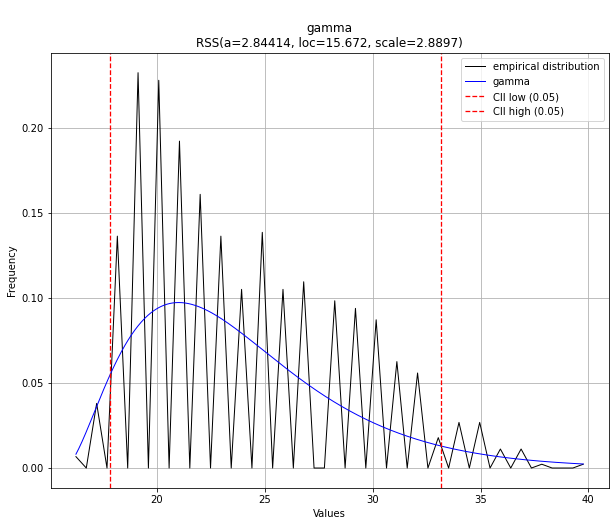

In [42]:
dist.plot()

In [44]:
rates = y

In [45]:
dist.fit_transform(rates)

[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0707451] [loc=80.105 scale=9.025]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.0861023] [loc=60.000 scale=20.105]
[distfit] >[pareto    ] [0.07 sec] [RSS: 0.0911228] [loc=-0.136 scale=60.136]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 0.0666573] [loc=78.810 scale=9.168]
[distfit] >[t         ] [0.10 sec] [RSS: 0.0707466] [loc=80.104 scale=9.025]
[distfit] >[genextreme] [0.06 sec] [RSS: 0.0652308] [loc=78.007 scale=9.708]
[distfit] >[gamma     ] [0.14 sec] [RSS: 0.0714313] [loc=-75.036 scale=0.542]
[distfit] >[lognorm   ] [0.22 sec] [RSS: 0.0711282] [loc=-231.215 scale=311.248]
[distfit] >[beta      ] [0.12 sec] [RSS: 0.0837321] [loc=59.993 scale=36.007]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.070689] [loc=60.000 scale=36.000]
[distfit] >[loggamma  ] [0.04 sec] [RSS: 0.0624689] [loc=89.796 scale=3.831]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.loggamma_gen at 0x25ef37831f0>,
  'stats': 'RSS',
  'params': (0.40445251094368095, 89.79558832606045, 3.831319870183342),
  'name': 'loggamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x25ef2aa1340>,
  'score': 0.06246888398094876,
  'loc': 89.79558832606045,
  'scale': 3.831319870183342,
  'arg': (0.40445251094368095,),
  'CII_min_alpha': 60.283114660889424,
  'CII_max_alpha': 91.76963250856696},
 'summary':          distr     score  LLE         loc       scale  \
 0     loggamma  0.062469  NaN   89.795588     3.83132   
 1   genextreme  0.065231  NaN   78.006772    9.707668   
 2     dweibull  0.066657  NaN   78.810315     9.16836   
 3      uniform  0.070689  NaN        60.0        36.0   
 4         norm  0.070745  NaN   80.105038    9.024779   
 5            t  0.070747  NaN   80.103656    9.025048   
 6      lognorm  0.071128  NaN -231.215333  311.248166   
 7        gamma  0.071431  NaN  -75.035846    0.5417

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nloggamma\nRSS(c=0.404453, loc=89.7956, scale=3.83132)'}, xlabel='Values', ylabel='Frequency'>)

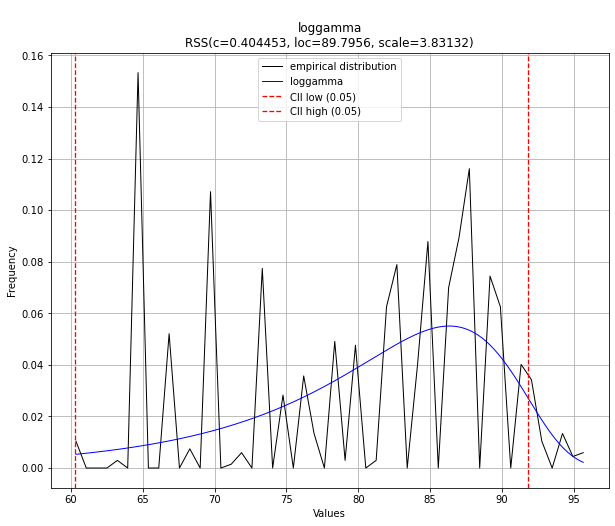

In [46]:
dist.plot()